In [1]:
from os import listdir
from os.path import isfile, join
import numpy
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D ,Dropout
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow import keras
import keras
from keras.models import Sequential
from sklearn.model_selection import KFold
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D,LSTM
from sklearn.metrics import plot_confusion_matrix,roc_curve, roc_auc_score
import tensorflow as tf
import numpy as np
from matplotlib.pyplot import imshow
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report 
import re
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [2]:
# #images = np.load('/content/drive/MyDrive/images.npy')
# def extract_number(string):
#     r = re.compile(r'(\d+)')
#     return int(r.findall(string)[0])


# dim = (300, 300)
# mypath= r'C:\Users\phmeay\Desktop\Work files\DTF-PDC\OPDC\OPDC\image files'
# onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
# sortedFiles = sorted(onlyfiles ,key=lambda x: extract_number(x) )
# images = np.empty((len(sortedFiles),300,300))
# for n in range(0, len(sortedFiles)):
#   img = cv2.imread( join(mypath,sortedFiles[n]),cv2.IMREAD_GRAYSCALE  )
#   images[n] = cv2.resize(img, dim)
# label_motion = np.ones((len(images[:,1,1]))-952)
# label_therapy = np.zeros((len(images[:,1,1]))-663)
# y = np.hstack((label_motion,label_therapy))

# print(images.shape)
# print(y.shape)

In [3]:
#images = np.load('/content/drive/MyDrive/images.npy')
def extract_number(string):
    r = re.compile(r'(\d+)')
    return int(r.findall(string)[0])


dim = (300, 300)
mypath= r'C:\Users\phmeay\Desktop\Work files\DTF-PDC\OPDC\OPDC\images file'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
sortedFiles = sorted(onlyfiles ,key=lambda x: extract_number(x) )
# images = numpy.empty(len(sortedFiles), dtype=object)
images =[]
for n in range(0, len(sortedFiles)):
  img  = cv2.imread( join(mypath,sortedFiles[n]),cv2.IMREAD_GRAYSCALE  )
  images.append(img)
  # images[n] = cv2.resize(img, dim)
images =np.array(images)
label_motion = np.ones((len(images[:,1,1]))-952)
label_therapy = np.zeros((len(images[:,1,1]))-663)
y = np.hstack((label_motion,label_therapy))

print(images.shape)
print(y.shape)

(1615, 656, 875)
(1615,)


In [4]:
X= images.reshape((images.shape[0], 656*875))

In [5]:
num_classes =2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=8)

In [6]:
# convert from integers to floats
train_norm = X_train.astype('float32')
test_norm = X_test.astype('float32')
# normalize to range 0-1
X_train = train_norm / 255.0
X_test = test_norm / 255.0

In [7]:
pca=PCA(0.90)  
pca.fit(X_train)  
print('Number of components to explain 90% Variance is',pca.n_components_)

Number of components to explain 90% Variance is 43


In [8]:
train_img_pca = pca.transform(X_train)
test_img_pca = pca.transform(X_test)
print(train_img_pca.shape)
print(test_img_pca.shape)

(1130, 43)
(485, 43)


In [9]:
sc=StandardScaler()
#fit only on Training data  
sc.fit(X_train)   
#Apply the transformation to both test & train data   
X_train=sc.fit_transform(X_train)   
X_test=sc.fit_transform(X_test)

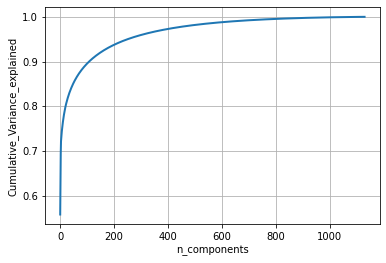

In [10]:
pca0=PCA()  
pca0.n_components=1130  
pca_data=pca0.fit_transform(X_train)
percentage_var_explained = pca0.explained_variance_ratio_;  
cum_var_explained=np.cumsum(percentage_var_explained)
#plot PCA spectrum   
plt.figure(1,figsize=(6,4))
plt.clf()  
plt.plot(cum_var_explained,linewidth=2)  
plt.axis('tight')  
plt.grid() 
plt.xlabel('n_components') 
plt.ylabel('Cumulative_Variance_explained')  
plt.show()

In [11]:
# pca2=PCA(0.90)  
# pca2.fit(X_train)  
print('Number of components to explain 90% Variance is',pca.n_components_)

Number of components to explain 90% Variance is 43


In [19]:
import pandas as pd
pca3=PCA(n_components=2) 
pca_data_vis=pca3.fit_transform(X_train) 
print('shape of PCA data',pca_data_vis.shape)

shape of PCA data (1130, 2)


C:\Users\phmeay\.conda\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


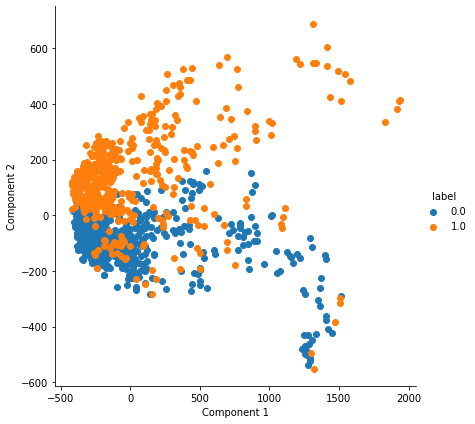

In [20]:
pca_data_vis = np.vstack((pca_data_vis.T,y_train)).T
#label=['Motion plus','therapy plus']
pca_vis_df = pd.DataFrame(data=pca_data_vis,columns=("Component 1","Component 2","label"))  
sns.FacetGrid(pca_vis_df,hue="label",size=6).map(plt.scatter,'Component 1','Component 2').add_legend()
plt.show()

In [21]:
pcaa=PCA(n_components=2) 
pca_data_vis2=pcaa.fit_transform(X_test) 
print('shape of PCA data',pca_data_vis2.shape)

shape of PCA data (485, 2)


C:\Users\phmeay\.conda\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


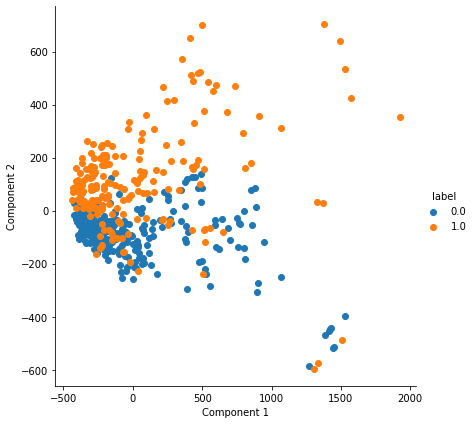

In [22]:

pca_data_vis2 = np.vstack((pca_data_vis2.T,y_test)).T
#label=['Motion plus','therapy plus']
pca_vis_df = pd.DataFrame(data=pca_data_vis2,columns=("Component 1","Component 2","label"))  
sns.FacetGrid(pca_vis_df,hue="label",size=6).map(plt.scatter,'Component 1','Component 2').add_legend()
plt.show()

In [16]:
## 3-D Plane

In [17]:

pca4=PCA(n_components=3) 
pca_data_vis1=pca4.fit_transform(X_train) 
print('shape of PCA data',pca_data_vis1.shape)

shape of PCA data (1130, 3)


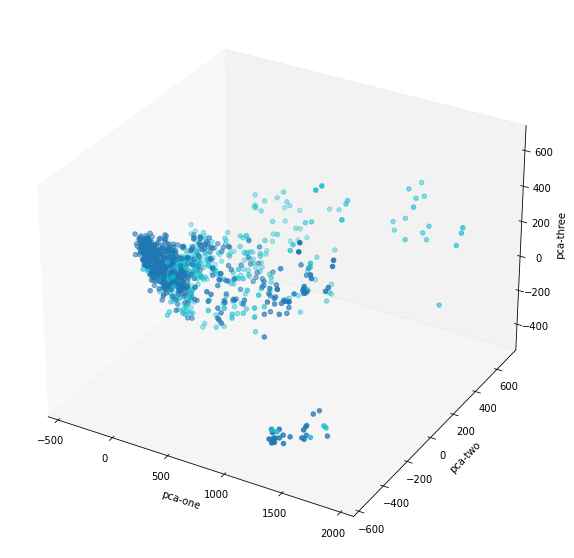

In [18]:

pca_data_vis1 = np.vstack((pca_data_vis1.T,y_train)).T
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=pca_data_vis1[:,0], 
    ys=pca_data_vis1[:,1], 
    zs=pca_data_vis1[:,2], 
    c=pca_data_vis1[:,3], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
ax.grid(False)
plt.show()

In [24]:
pca5=PCA(n_components=3) 
pca_data_vis3=pca5.fit_transform(X_test) 
print('shape of PCA data',pca_data_vis3.shape)

shape of PCA data (485, 3)


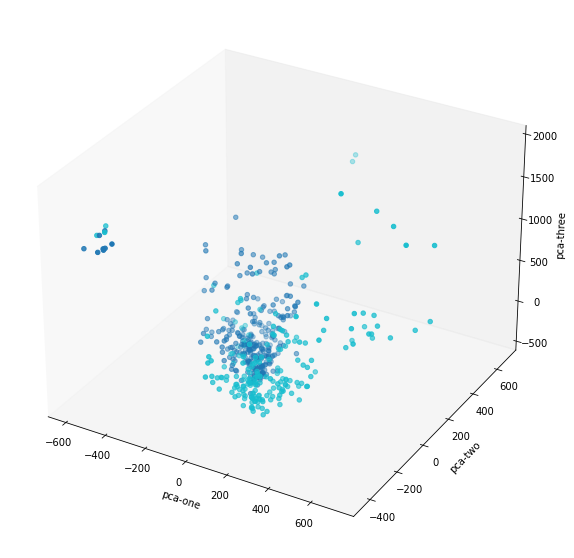

In [28]:
pca_data_vis3 = np.vstack((pca_data_vis3.T,y_test)).T
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=pca_data_vis3[:,1], 
    ys=pca_data_vis3[:,2], 
    zs=pca_data_vis3[:,0], 
    c=pca_data_vis3[:,3], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
ax.grid(False)
plt.show()
